## Infraestrutura

1- Você está rodando em Python 3.9+

2- Você está usando um ambiente virtual: Virtualenv ou Anaconda

3- Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico

4- Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.

5- Tire um printscreen do ambiente que será usado rodando em sua máquina.
![Infra](conda_infra_pd.jpg)

6- Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

https://github.com/FTNeves80/clusterizacao/blob/main/pd_validacao.ipynb

## Escolha de base de dados

### Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

1.Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.

2.Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.

3.Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

4.Realize o pré-processamento adequado dos dados. Descreva os passos necessários.


In [2]:
import pandas as pd

df = pd.read_csv("winequalityN.csv", sep=",")
df.head()


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [6]:
# Check data types
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [8]:
# Basic statistics of the dataset
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000           

In [3]:
print("Dimensão:", df.shape)
print("###################")
df.info()

Dimensão: (6497, 13)
###################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [10]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_22816\3005946532.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='quality', palette='viridis')


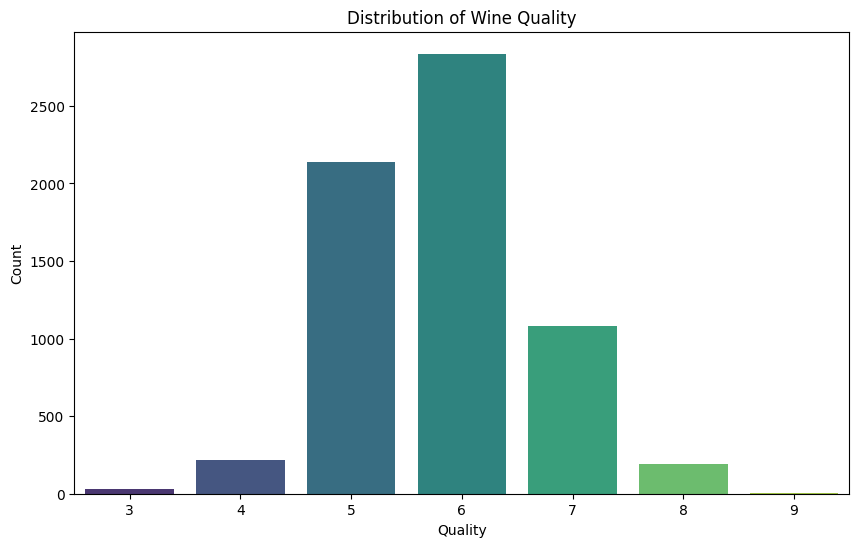

In [11]:
# Visualizing the distribution of the target variable (wine quality)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='quality', palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [12]:
# Filter out non-numeric columns (if any)
# Assuming all columns except 'quality' are numeric
numeric_data = df.select_dtypes(include=[np.number])

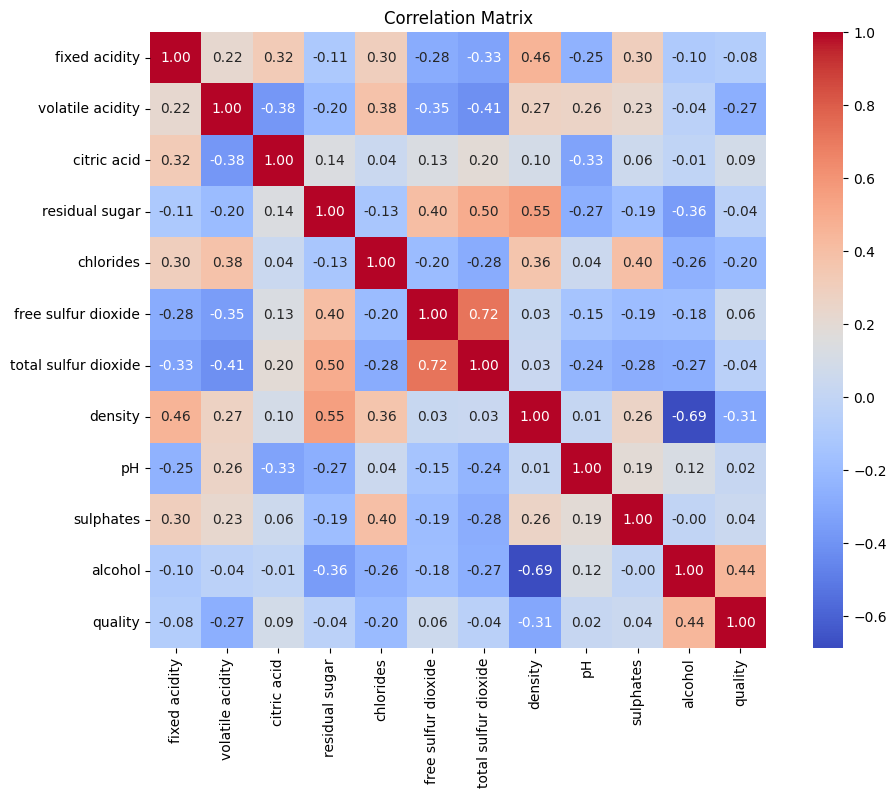

In [13]:
# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()  # Only use numeric data for correlation
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

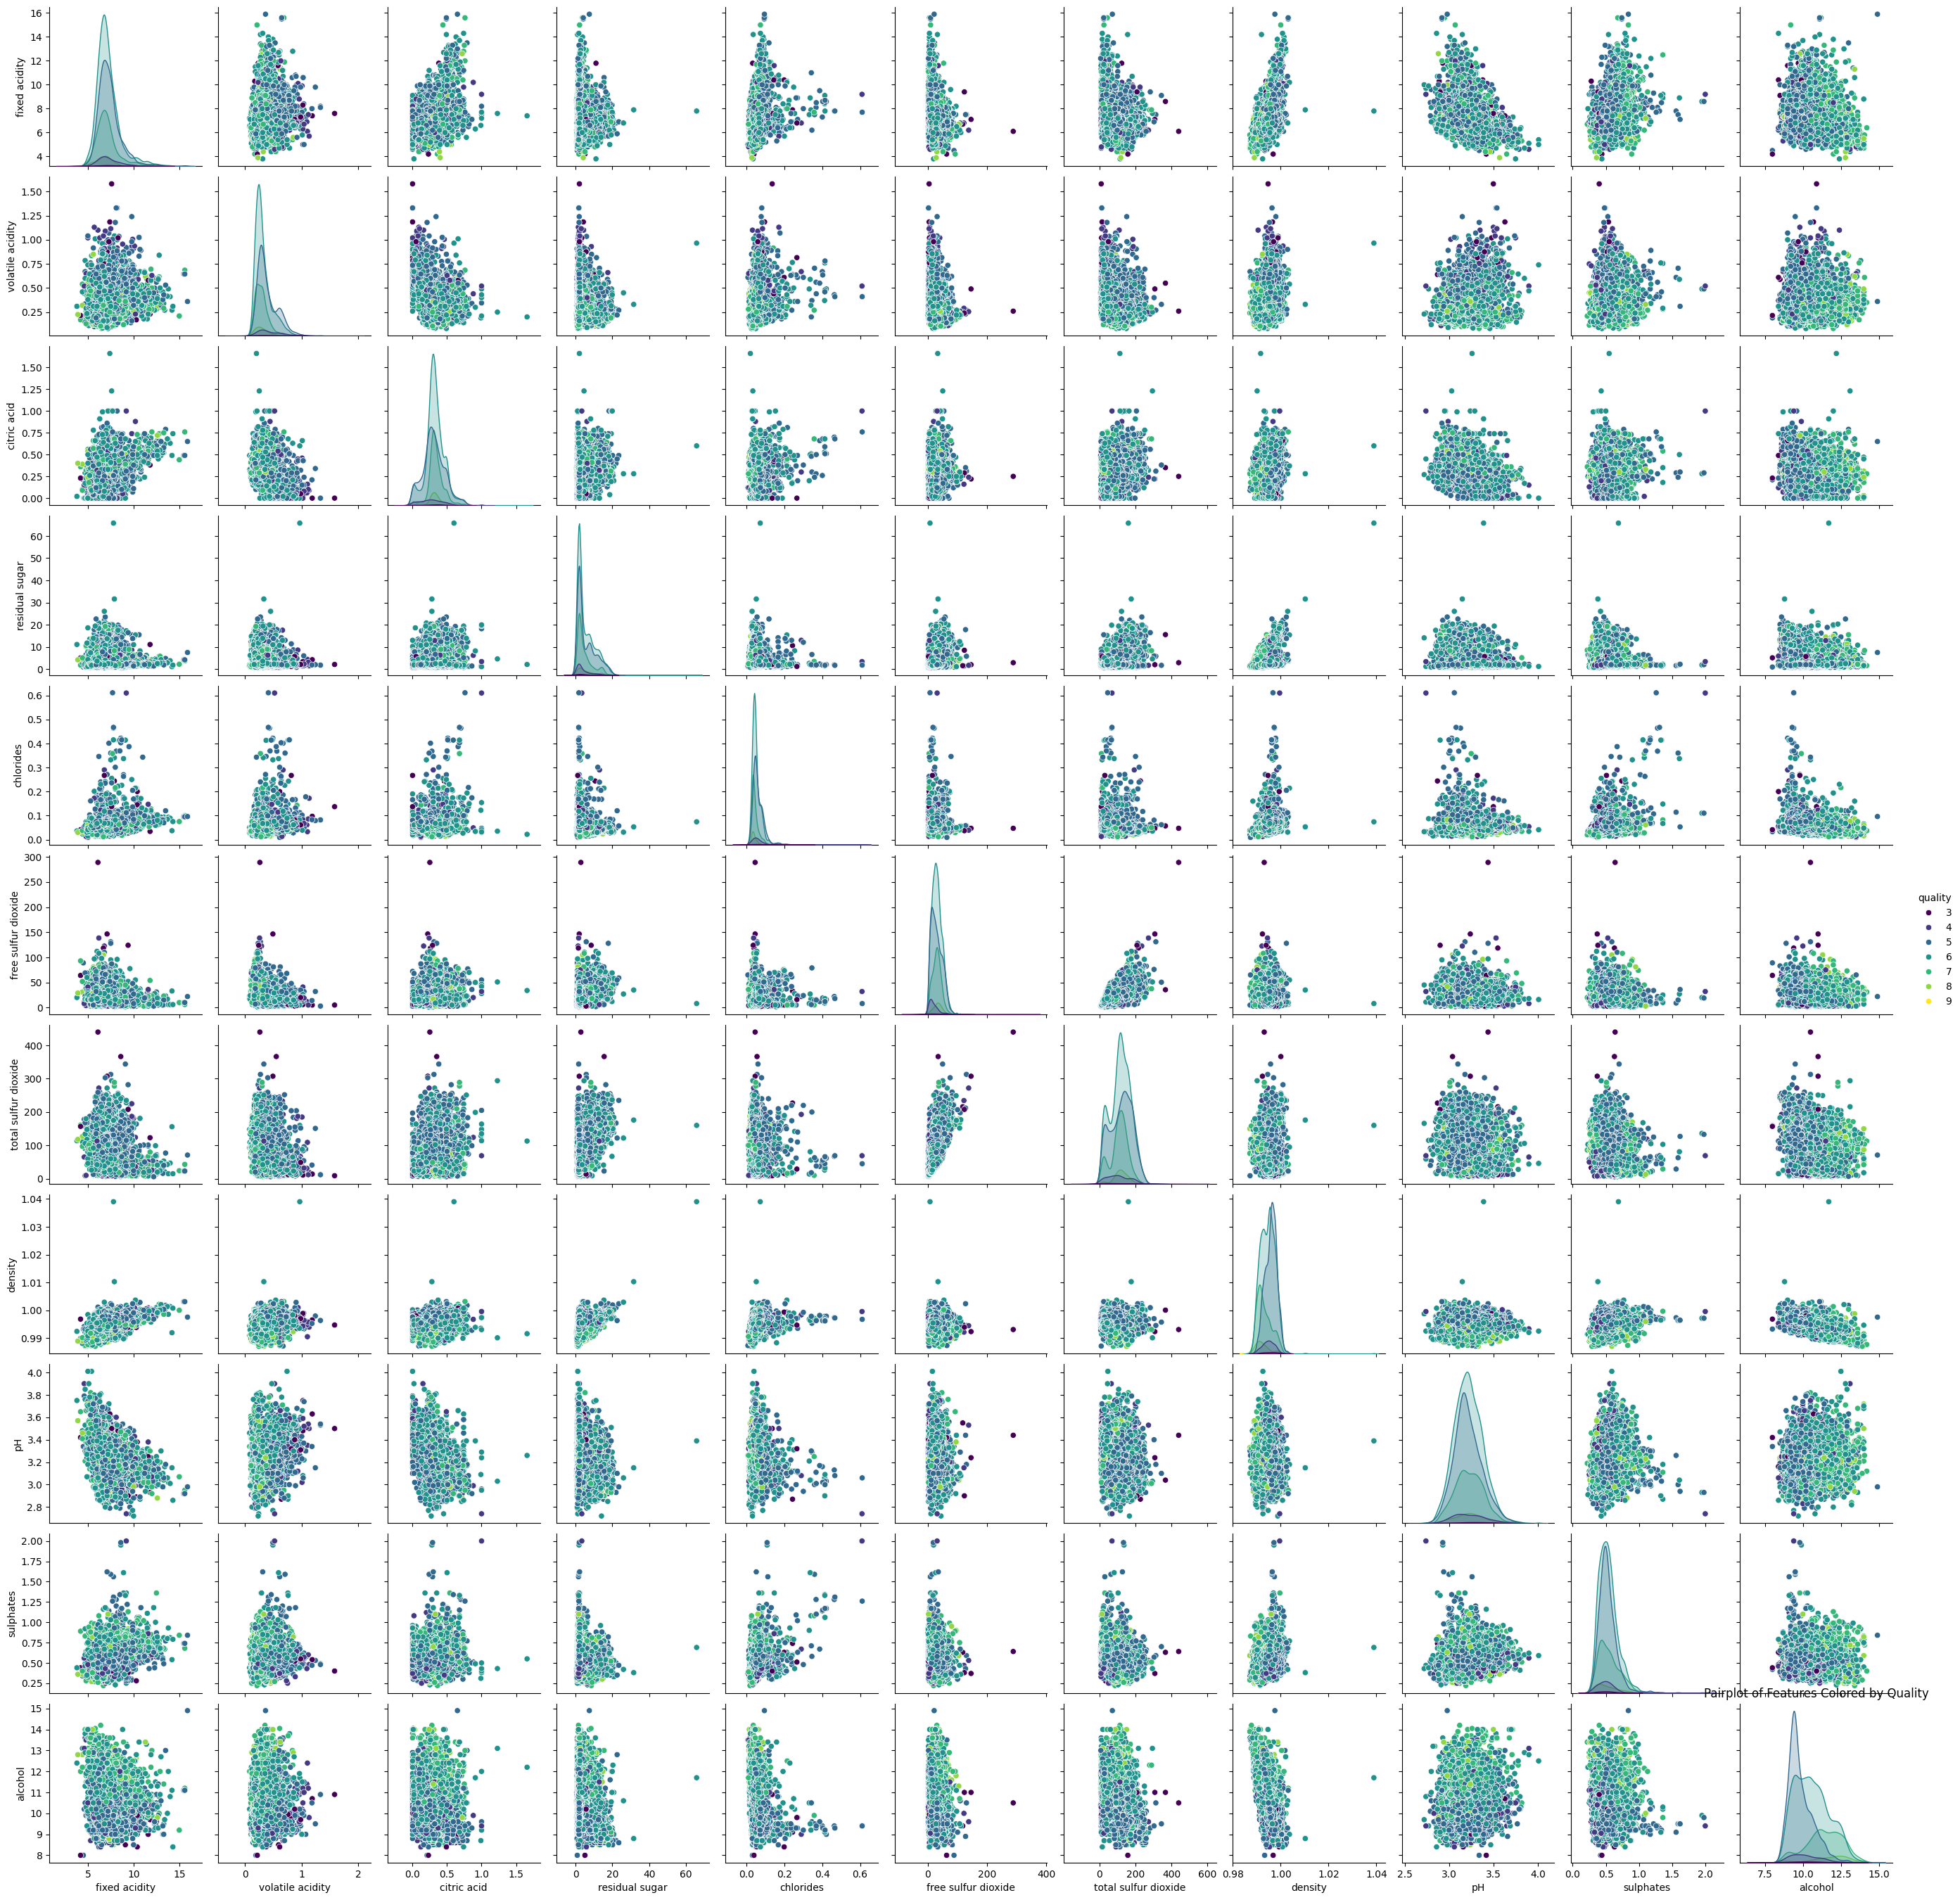

In [14]:
# Pairplot to visualize the relationships between features
sns.pairplot(numeric_data, hue='quality', palette='viridis', diag_kind='kde')
plt.title('Pairplot of Features Colored by Quality')
plt.show()

In [ ]:
# Box plots for analyzing the relationship between quality and features
features = numeric_data.columns[:-1]  # Exclude the quality column
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='quality', y=feature, palette='viridis')
    plt.title(f'Box plot of {feature} by Quality')
    plt.xlabel('Quality')
    plt.ylabel(feature)
    plt.show()

min       25%        50%        75%        max  \
total sulfur dioxide  6.00000  77.00000  118.00000  156.00000  440.00000   
free sulfur dioxide   1.00000  17.00000   29.00000   41.00000  289.00000   
residual sugar        0.60000   1.80000    3.00000    8.10000   65.80000   
fixed acidity         3.80000   6.40000    7.00000    7.70000   15.90000   
alcohol               8.00000   9.50000   10.30000   11.30000   14.90000   
quality               3.00000   5.00000    6.00000    6.00000    9.00000   
sulphates             0.22000   0.43000    0.51000    0.60000    2.00000   
citric acid           0.00000   0.25000    0.31000    0.39000    1.66000   
volatile acidity      0.08000   0.23000    0.29000    0.40000    1.58000   
pH                    2.72000   3.11000    3.21000    3.32000    4.01000   
chlorides             0.00900   0.03800    0.04700    0.06500    0.61100   
density               0.98711   0.99234    0.99489    0.99699    1.03898   

                            mean        std      range       iqr  
total sulfur dioxide  115.744574  56.521855  434.00000  79.00000  
free sulfur dioxide    30.525319  17.749400  288.00000  24.00000  
residual sugar          5.444326   4.758125   65.20000   6.30000  
fixed acidity           7.216579   1.296750   12.10000   1.30000  
alcohol                10.491801   1.192712    6.90000   1.80000  
quality                 5.818378   0.873255    6.00000   1.00000  
sulphates               0.531215   0.148814    1.78000   0.17000  
citric acid             0.318722   0.145265    1.66000   0.14000  
volatile acidity        0.339691   0.164649    1.50000   0.17000  
pH                      3.218395   0.160748    1.29000   0.21000  
chlorides               0.056042   0.035036    0.60200   0.02700  
density                 0.994697   0.002999    0.05187   0.00465

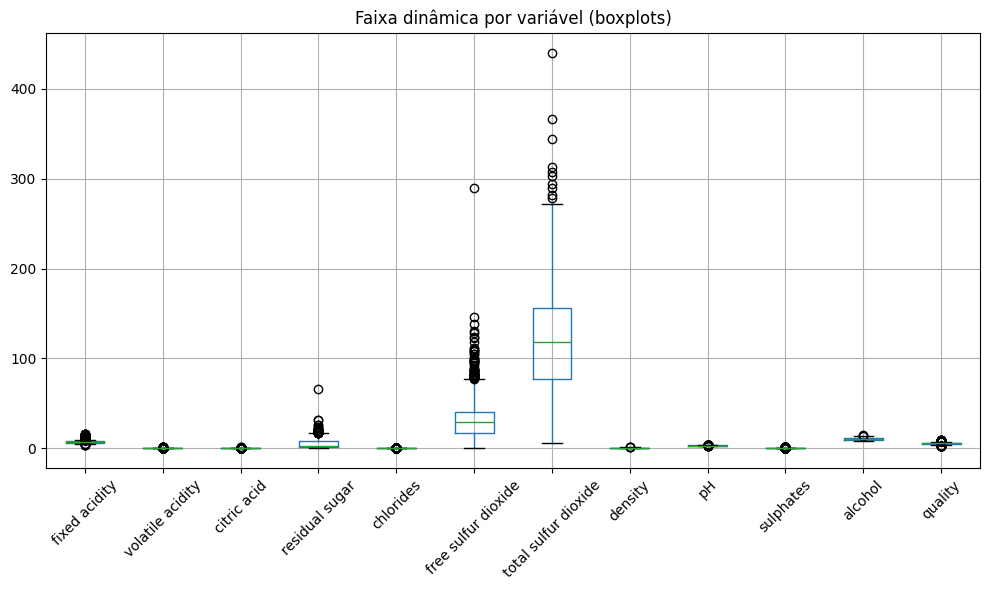

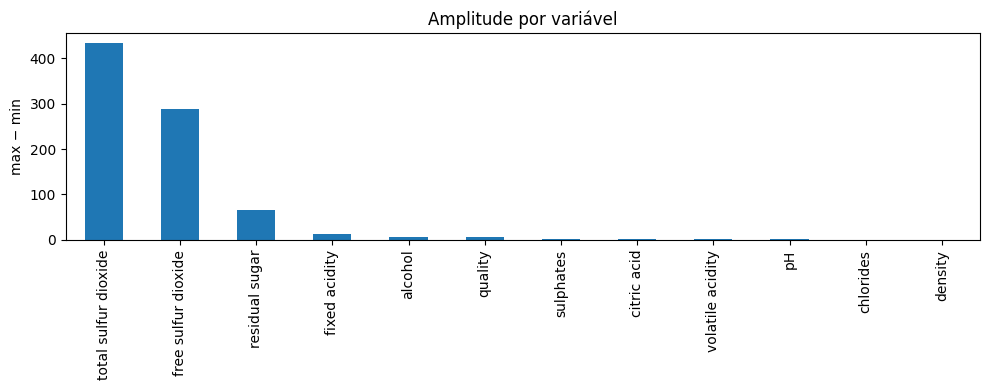

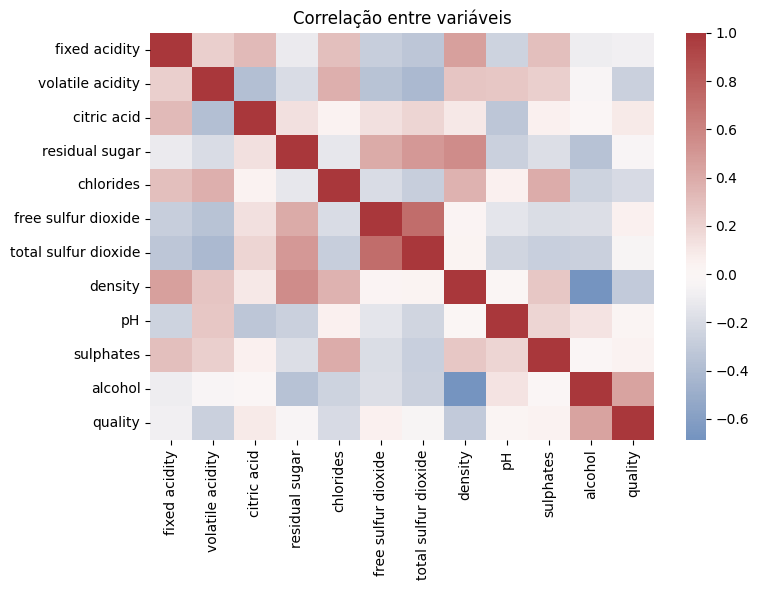

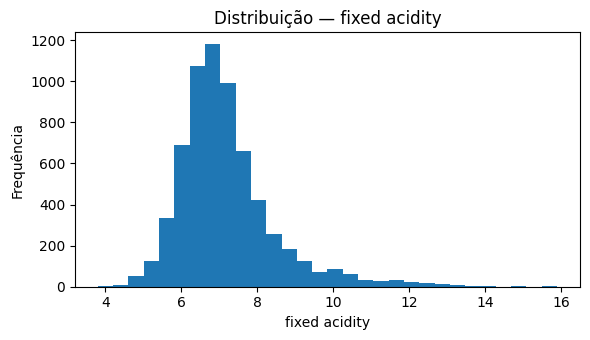

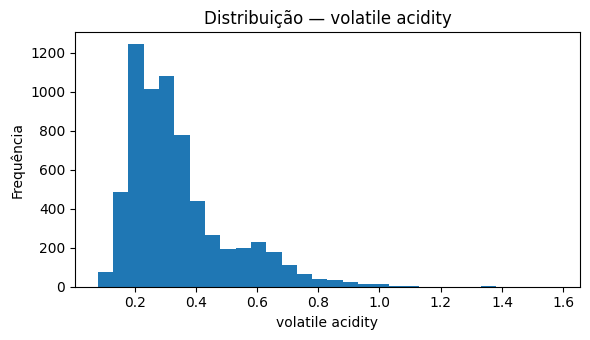

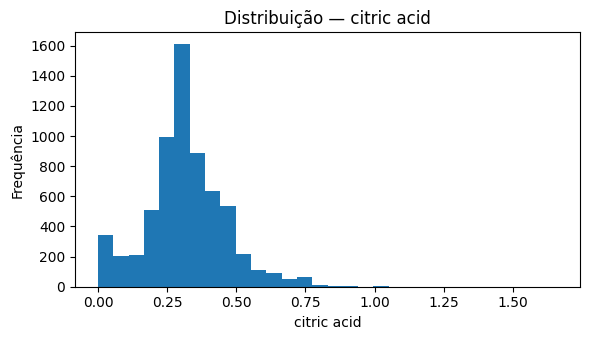

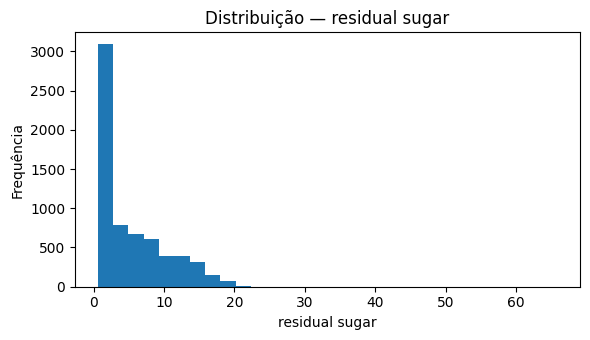

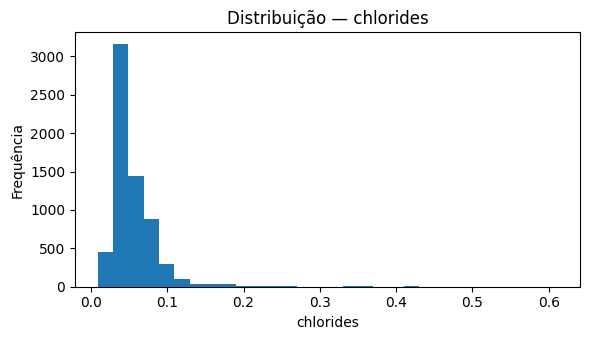

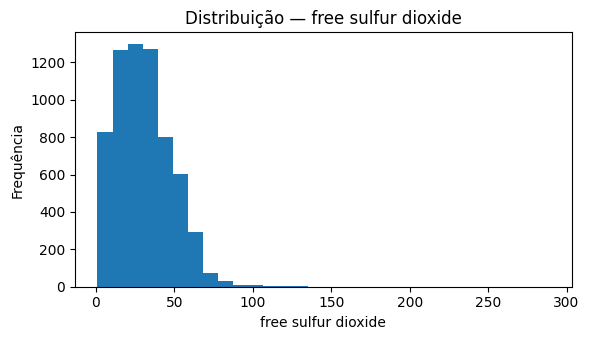

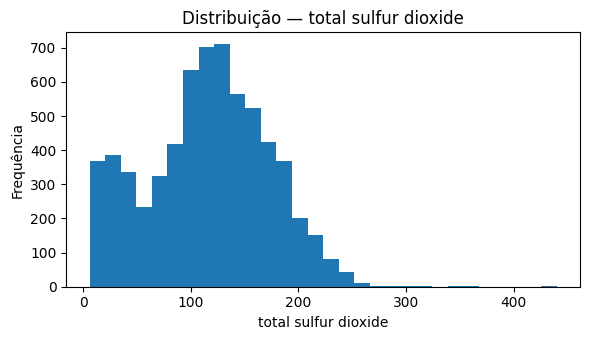

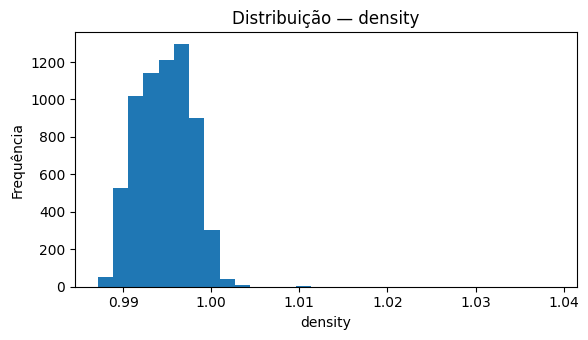

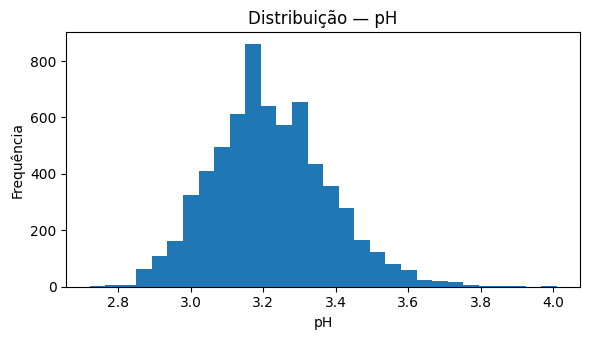

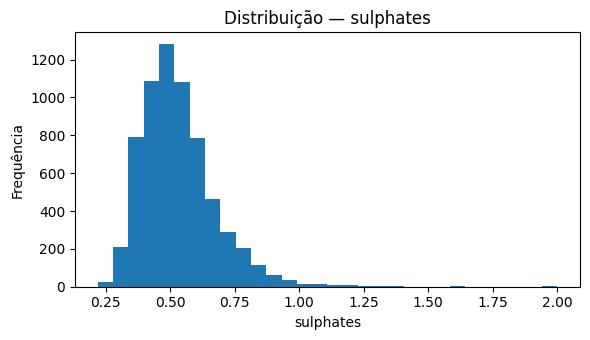

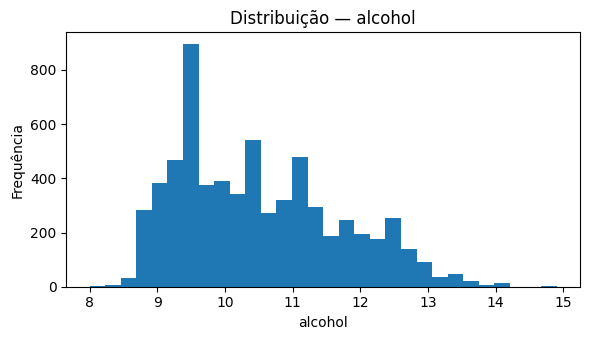

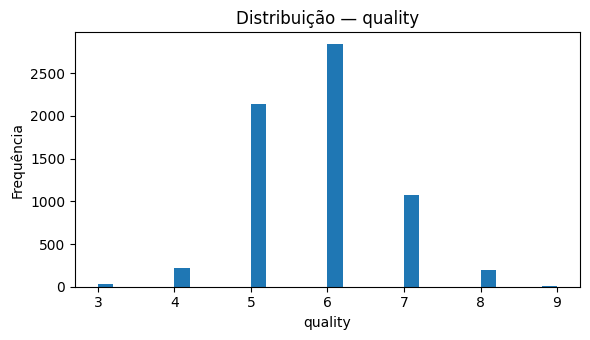

In [4]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

#Seleciona apenas numéricas 
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Estatísticas + amplitude
stats = df[num_cols].describe().T
stats["range"] = stats["max"] - stats["min"]
stats["iqr"]   = stats["75%"] - stats["25%"]
display(stats[["min","25%","50%","75%","max","mean","std","range","iqr"]].sort_values("range", ascending=False))

# Boxplots
plt.figure(figsize=(10,6))
df[num_cols].boxplot(rot=45)
plt.title("Faixa dinâmica por variável (boxplots)")
plt.tight_layout(); plt.show()

# Amplitude (max - min)
(df[num_cols].max() - df[num_cols].min()).sort_values(ascending=False).plot(kind="bar", figsize=(10,4))
plt.title("Amplitude por variável"); plt.ylabel("max − min"); plt.tight_layout(); plt.show()


# Correlação
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), cmap="vlag", center=0, annot=False)
plt.title("Correlação entre variáveis"); plt.tight_layout(); plt.show()

# Histogramas
for col in num_cols:
    plt.figure(figsize=(6,3.5))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Distribuição — {col}"); plt.xlabel(col); plt.ylabel("Frequência"); plt.tight_layout(); plt.show()



## Clusterização

1.Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas: K-Médias  DBScan

2.Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.

3.Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

4.Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.

5.Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?


## Medidas de similaridade

1.Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.

2.Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

3.Indique um caso de uso para essa solução projetada.

4.Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.

